###Phase 2: Support Vector Machines (SVM)
Concepts: Margin, kernels, linear/non-linear classification, Dimensionality Reduction using PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 1:Data Understanding

In [3]:
import pandas as pd
file_path = '/content/drive/MyDrive/creditcard.csv'
df = pd.read_csv(file_path)
df.info()
df.head()
print("Data shape:",df.shape)
print(df['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Step 2: Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler
#dropped the column 'Time' and scaled the column 'Amount'
df.drop(['Time'], axis=1, inplace=True)
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
print("Original class distribution:")
print(df['Class'].value_counts())
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]
non_fraud_sampled = non_fraud.sample(n=len(fraud), random_state=42)
df_balanced = pd.concat([fraud, non_fraud_sampled], axis=0).sample(frac=1, random_state=42)
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']
print("\nBalanced class distribution:")
print(y.value_counts())
print("Balanced dataset shape:", X.shape)

Original class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Balanced class distribution:
Class
0    492
1    492
Name: count, dtype: int64
Balanced dataset shape: (984, 29)


Step 3: Train SVM with Different Kernels

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
kernels = ['linear', 'rbf', 'poly']
results = []
for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((kernel, acc))
    print(f"{kernel.upper()} kernel accuracy: {acc:.4f}")


LINEAR kernel accuracy: 0.9391
RBF kernel accuracy: 0.9289
POLY kernel accuracy: 0.8731


Step 4: PCA Visualization

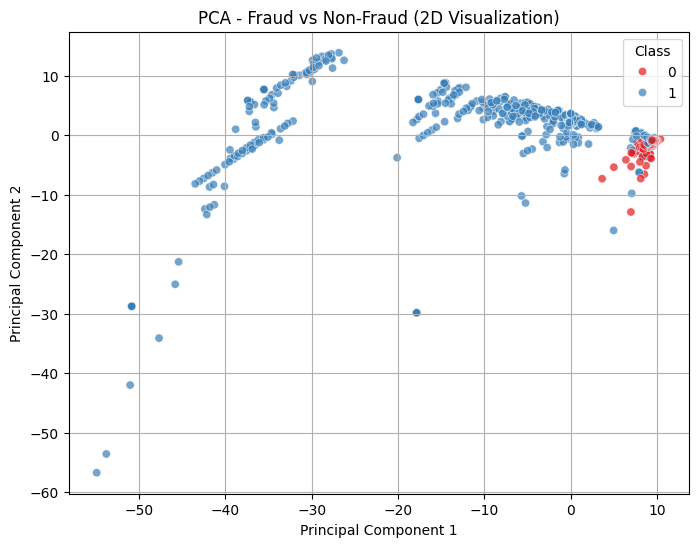

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y.values
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Class', palette='Set1', alpha=0.7)
plt.title('PCA - Fraud vs Non-Fraud (2D Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

##Final Summary: SVM Kernel Accuracy Comparison

We trained three SVM models using a balanced subset of the credit card fraud dataset (492 fraud + 492 non-fraud).

###Accuracy Comparison:

| Kernel     | Accuracy |
|------------|----------|
| Linear     | 0.9391   |
| RBF        | 0.9289   |
| Polynomial | 0.8731   |

###Kernel Effect Summary:

- **Linear kernel**: data is nearly linearly separable.
- **RBF kernel**: Slightly worse but captures some non-linear separation.
- **Polynomial kernel**: Overfits — high complexity doesn’t help here.

